In [64]:
from io import StringIO
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error
import pydotplus
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt


In [91]:
df = pd.read_csv('possum.csv')


AttributeError: 'DataFrame' object has no attribute 'cor'

In [41]:
df.dropna(inplace = True)

In [53]:
df.isna().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [94]:
df.isna().sum()

case        0
site        0
Pop         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
f           3
m           3
dtype: int64

In [55]:
sexs = df.sex.values.reshape(-1,1)
ohc = OneHotEncoder(handle_unknown = 'ignore')
dummies = ohc.fit_transform(sexs).toarray()
df.drop('sex',axis = 1, inplace = True)
df = df.join(pd.DataFrame(dummies, columns=ohc.categories_[0]))
df

,case,site,Pop,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,f,m
0,1,1,Vic,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,0.0,1.0
1,2,1,Vic,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,1.0,0.0
2,3,1,Vic,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,1.0,0.0
3,4,1,Vic,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,1.0,0.0
4,5,1,Vic,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0,0.0,1.0
100,101,7,other,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0,1.0,0.0
101,102,7,other,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0,NaN,NaN
102,103,7,other,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0,NaN,NaN


In [56]:
df['Pop'] = df.Pop.map({"Vic":1,"other":0})


In [21]:
df.dropna(inplace = True)

other    55
Vic      43
Name: Pop, dtype: int64

In [39]:
df.isna().sum()

case         0
site         0
Pop         98
age          0
hdlngth      0
skullw       0
totlngth     0
taill        0
footlgth     0
earconch     0
eye          0
chest        0
belly        0
f            0
m            0
dtype: int64

In [74]:
X = df.iloc[:, [1, 2,4,5,6,7,8,9,10,11,12]]
y = df.iloc[:, 3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [75]:
df

,case,site,Pop,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,f,m
0,1,1,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,0.0,1.0
1,2,1,1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,1.0,0.0
2,3,1,1,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,1.0,0.0
3,4,1,1,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,1.0,0.0
4,5,1,1,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,0,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0,0.0,1.0
100,101,7,0,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0,1.0,0.0
101,102,7,0,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0,NaN,NaN
102,103,7,0,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0,NaN,NaN


In [49]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [50]:
cm = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_pred, y_test))

cm

0.6451612903225806


array([[ 6,  7],
       [ 4, 14]], dtype=int64)

In [76]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
coefficient_of_dermination = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(r2)

-2.4738235294117654


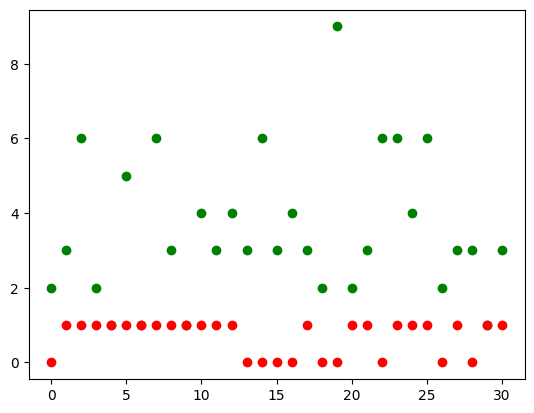

In [90]:
plt.scatter(range(len(y_test)),y_test, color = 'green')
plt.scatter(range(len(y_pred)),y_pred,color = 'red')
plt.show()

In [89]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1], dtype=int64)